In [2]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz  # wget會從網址下載檔案
!gunzip cc.en.300.bin.gz

--2020-06-04 13:51:43--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 2606:4700:10::6816:4b8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G  14.3MB/s    in 5m 3s   

2020-06-04 13:56:47 (14.2 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [0]:
import pandas as pd


In [2]:
# Fasttext斷字資料庫（預訓練好的300 dim 語料庫無法continue training）
#! pip install fasttext
import fasttext
import fasttext.util
ft = fasttext.load_model('cc.en.300.bin')
#ft.get_dimension()
fasttext.util.reduce_model(ft, 100) # 降到100維

In [56]:
# reload a file to a variable
import pickle
with open('/content/drive/My Drive/野村_文字探勘_加減碼_組別一/Reddit/30up_processed_reddit.pickle', 'rb') as file:
    df_reddit_all_fund =pickle.load(file)

df_reddit_all_fund

,Date,Score,Title,Content,title_edited,content_edited
3175,2011-04-05,83,Reddit Investment Club: Would you be interested?,"I'm just throwing it out there for discussion,...","[reddit, investment, club, interested]","[throwing, discussion, chime, ideas/suggestion..."
3197,2011-04-10,77,Top 10 things I've learned about people like y...,I help finance personal and business loans thr...,"[thing, learned, people, like, loaning, money]","[help, finance, personal, business, loan, pros..."
3369,2011-05-26,66,Congress outperforms average investor by 6% pe...,nan,"[congress, outperforms, average, investor, yea...",[]
3385,2011-05-30,35,Earn about 35-45k/year. Saved 200k. How should...,"I freelance in film and television, which lead...","[earn, 35-45k/year, saved, 200k, invest]","[freelance, film, television, lead, lot, busy,..."
3438,2011-06-14,34,Why Groupon is poised for collapse,nan,"[groupon, poised, collapse]",[]
...,...,...,...,...,...,...
23253,2020-04-16,124,Has anyone else noticed a strong uptick in noo...,Seems like there are more posts from “first ti...,"[noticed, strong, uptick, noob/first, time, in...","[like, post, time, getting, market, poster, no..."
23254,2020-04-17,542,"Shopify CTO: ""our platform is now handling Bla...",\n\nGoes along with what WIX said the other da...,"[shopify, cto, platform, handling, black, frid...","[go, wix, said, day, belief, platform, fare, e..."
23255,2020-04-17,235,"GILD releases statement on remdesivir, saying ...",Today GILD releaseed a statement on ***remdesi...,"[gild, release, statement, remdesivir, saying,...","[today, gild, releaseed, statement, ***remdesi..."
23256,2020-04-18,103,Congressman calls for SEC investigation into l...,,"[congressman, call, sec, investigation, leak, ...",[]


In [57]:
# 同一天合併
df_reddit_all_fund = df_reddit_all_fund.sort_values(by='Date')
date_list = df_reddit_all_fund['Date'].dropna().drop_duplicates().tolist()

df_reddit_edited = df_reddit_all_fund[['Date','title_edited','content_edited']]
print(len(date_list))

df_get_vector = pd.DataFrame(columns = ['Date','Text'])

for item in date_list:
    l = []
    a = df_reddit_all_fund.groupby('Date').get_group(item) # type = dataframe
    a = a.reset_index(drop = True)
    for i in range(len(a)):
      l = l + a.loc[i,'title_edited'] + a.loc[i,'content_edited']
    df_get_vector = df_get_vector.append({ 'Date': a.loc[0,'Date'], 
                             'Text': l}, ignore_index = True)

df_get_vector

2729


,Date,Text
0,2011-04-05,"[reddit, investment, club, interested, throwin..."
1,2011-04-10,"[thing, learned, people, like, loaning, money,..."
2,2011-05-26,"[congress, outperforms, average, investor, yea..."
3,2011-05-30,"[earn, 35-45k/year, saved, 200k, invest, freel..."
4,2011-06-14,"[groupon, poised, collapse]"
...,...,...
2724,2020-04-14,"[airline, treasury, reach, agreement, principl..."
2725,2020-04-15,"[bear, market, rally, largely, fomo, buying, r..."
2726,2020-04-16,"[small, business, rescue, loan, program, hit, ..."
2727,2020-04-17,"[shopify, cto, platform, handling, black, frid..."


In [64]:
# get word vectors from pre-trained model from Facebook
# dim = 100
import numpy as np

#df_get_vector['Vectors'] = 0
v2_list = []
err = []

for i in range(len(df_get_vector)):
  text_list = df_get_vector.loc[i,'Text']
  v_list = []
  for j in range(len(text_list)):
    try:
      f = ft.get_word_vector(text_list[j])
      v_list.append(f) # a sparse matrix
      
    except Exception as e :
      print(i," ",e)
      err.append(text_list[j])

    v2_list.append(v_list)
  
#df_get_vector.loc[i,'Vectors'] = v_list
#df_get_vector
len(v2_list)

405921

In [73]:
df_t = pd.DataFrame(columns=['100 dim'])
df_t['100 dim'] = v2_list
df_get_vector['5_Vectors'] = df_t['100 dim']
#v2_list[0]
df_get_vector

,Date,Text,5_Vectors
0,2011-04-05,"[reddit, investment, club, interested, throwin...","[[-0.044691846, -0.2069555, 0.0025488473, -0.0..."
1,2011-04-10,"[thing, learned, people, like, loaning, money,...","[[-0.044691846, -0.2069555, 0.0025488473, -0.0..."
2,2011-05-26,"[congress, outperforms, average, investor, yea...","[[-0.044691846, -0.2069555, 0.0025488473, -0.0..."
3,2011-05-30,"[earn, 35-45k/year, saved, 200k, invest, freel...","[[-0.044691846, -0.2069555, 0.0025488473, -0.0..."
4,2011-06-14,"[groupon, poised, collapse]","[[-0.044691846, -0.2069555, 0.0025488473, -0.0..."
...,...,...,...
2724,2020-04-14,"[airline, treasury, reach, agreement, principl...","[[0.2365981, -0.20466095, -0.13347831, -0.2828..."
2725,2020-04-15,"[bear, market, rally, largely, fomo, buying, r...","[[0.2365981, -0.20466095, -0.13347831, -0.2828..."
2726,2020-04-16,"[small, business, rescue, loan, program, hit, ...","[[0.0587442, -0.09827107, -0.07613396, 0.14387..."
2727,2020-04-17,"[shopify, cto, platform, handling, black, frid...","[[0.0587442, -0.09827107, -0.07613396, 0.14387..."


In [74]:
# 展開每一天向量list


for i in range(0, len(df_get_vector), 1):
  if i%100 == 0:
    print(i)
  try:
    vector_list = []
    l1 = df_get_vector.loc[i,'5_Vectors']
    for j in range(len(l1)):
      l2 = l1[j]
      for k in range(len(l2)):
        vector_list.append(l2[k])
    df_get_vector.loc[i,'5_Vectors'] = vector_list
  except:
      print(i,' ',j, ' ',k,'',l2)
      print("=================================")
df_get_vector


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700


,Date,Text,5_Vectors
0,2011-04-05,"[reddit, investment, club, interested, throwin...","[-0.044691846, -0.2069555, 0.0025488473, -0.06..."
1,2011-04-10,"[thing, learned, people, like, loaning, money,...","[-0.044691846, -0.2069555, 0.0025488473, -0.06..."
2,2011-05-26,"[congress, outperforms, average, investor, yea...","[-0.044691846, -0.2069555, 0.0025488473, -0.06..."
3,2011-05-30,"[earn, 35-45k/year, saved, 200k, invest, freel...","[-0.044691846, -0.2069555, 0.0025488473, -0.06..."
4,2011-06-14,"[groupon, poised, collapse]","[-0.044691846, -0.2069555, 0.0025488473, -0.06..."
...,...,...,...
2724,2020-04-14,"[airline, treasury, reach, agreement, principl...","[0.2365981, -0.20466095, -0.13347831, -0.28283..."
2725,2020-04-15,"[bear, market, rally, largely, fomo, buying, r...","[0.2365981, -0.20466095, -0.13347831, -0.28283..."
2726,2020-04-16,"[small, business, rescue, loan, program, hit, ...","[0.0587442, -0.09827107, -0.07613396, 0.143872..."
2727,2020-04-17,"[shopify, cto, platform, handling, black, frid...","[0.0587442, -0.09827107, -0.07613396, 0.143872..."


In [75]:
l = []
for i in range(len(df_get_vector)):
  l.append(len(df_get_vector.loc[i,'5_Vectors']))


print(max(l))

80400


In [0]:
# 把每天的向量長度補0補到跟最長的那天一樣
pad_list = []
for i in range(len(df_get_vector)):
  width = 80400 - len(df_get_vector.loc[i,'5_Vectors'])
  df_get_vector.loc[i,'5_Vectors'] = np.pad(df_get_vector.loc[i,'5_Vectors'], (0, width ), constant_values =0)

In [39]:
# PCA
from sklearn.decomposition import PCA

pca_vector_list = np.array(df_get_vector['5_Vectors'].tolist())

pca = PCA(n_components = 5) # 每天降成五維

new_vector = pca.fit_transform(pca_vector_list)

new_vector

array([[-6.323856 , -2.0471277, -2.0278535, -1.4562283, -1.0994946],
       [-6.3238673, -2.0471435, -2.0277867, -1.4562563, -1.0994828],
       [-6.3238673, -2.0471516, -2.0278668, -1.4562508, -1.0994986],
       ...,
       [-6.1928234, -1.8906142, -2.147569 , -1.4337283, -1.1089072],
       [-6.1928234, -1.8906142, -2.147569 , -1.4337283, -1.1089072],
       [-6.1928234, -1.8906142, -2.147569 , -1.4337283, -1.1089072]],
      dtype=float32)

In [40]:
len(new_vector)

2729

In [42]:

df_get_vector['5_Vectors'] = list(new_vector)

df_get_vector


,Date,Text,5_Vectors
0,2011-04-05,"[reddit, investment, club, interested, throwin...","[-6.323856, -2.0471277, -2.0278535, -1.4562283..."
1,2011-04-10,"[thing, learned, people, like, loaning, money,...","[-6.3238673, -2.0471435, -2.0277867, -1.456256..."
2,2011-05-26,"[congress, outperforms, average, investor, yea...","[-6.3238673, -2.0471516, -2.0278668, -1.456250..."
3,2011-05-30,"[earn, 35-45k/year, saved, 200k, invest, freel...","[-6.3238673, -2.0471513, -2.0278628, -1.456235..."
4,2011-06-14,"[groupon, poised, collapse]","[-6.3238673, -2.0471513, -2.0278628, -1.456245..."
...,...,...,...
2724,2020-04-14,"[airline, treasury, reach, agreement, principl...","[-6.238138, -1.906116, -2.106356, -1.463159, -..."
2725,2020-04-15,"[bear, market, rally, largely, fomo, buying, r...","[-6.238138, -1.906116, -2.106356, -1.463159, -..."
2726,2020-04-16,"[small, business, rescue, loan, program, hit, ...","[-6.1928234, -1.8906142, -2.147569, -1.4337283..."
2727,2020-04-17,"[shopify, cto, platform, handling, black, frid...","[-6.1928234, -1.8906142, -2.147569, -1.4337283..."


In [0]:
file = open('/content/drive/My Drive/野村_文字探勘_加減碼_組別一/Reddit/PCA_Scalar_5dim_30up.pickle', 'wb')
pickle.dump(df_get_vector2, file)
file.close()


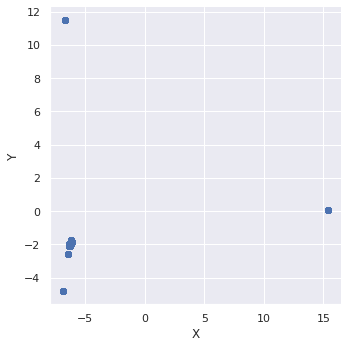

In [50]:
# pca 畫成2維的圖試試
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(24,18)})

pca = PCA(n_components = 2) # 2維
pic_list = np.array(df_get_vector['5_Vectors'].tolist())
pic_vector = pca.fit_transform(pic_list)
pic_df = pd.DataFrame(data = pic_vector, columns=['X','Y'])
sns.lmplot('X', 'Y', data = pic_df, fit_reg=False)

plt.show()

In [77]:
# Standard Scalar PCA
from sklearn.preprocessing import StandardScaler

pca_vector_list = np.array(df_get_vector['5_Vectors'].tolist())
pca_x = StandardScaler().fit_transform(pca_vector_list)

pca = PCA(n_components = 5) # 每天降成五維
new_vector2 = pca.fit_transform(pca_x)

new_vector2

array([[-157.9978  ,  -48.443027,  -32.294434,  -30.786875,  -22.634579],
       [-157.99788 ,  -48.441658,  -32.294376,  -30.787516,  -22.634346],
       [-157.99788 ,  -48.441788,  -32.294373,  -30.787176,  -22.634272],
       ...,
       [-156.84184 ,  -47.265984,  -33.673912,  -30.5844  ,  -22.293045],
       [-156.84184 ,  -47.265984,  -33.673912,  -30.5844  ,  -22.293045],
       [-156.84184 ,  -47.265984,  -33.673912,  -30.5844  ,  -22.293045]],
      dtype=float32)

In [78]:
df_get_vector2 = df_get_vector
df_get_vector2['5_Vectors'] = list(new_vector2)

df_get_vector2

,Date,Text,5_Vectors
0,2011-04-05,"[reddit, investment, club, interested, throwin...","[-157.9978, -48.443027, -32.294434, -30.786875..."
1,2011-04-10,"[thing, learned, people, like, loaning, money,...","[-157.99788, -48.441658, -32.294376, -30.78751..."
2,2011-05-26,"[congress, outperforms, average, investor, yea...","[-157.99788, -48.441788, -32.294373, -30.78717..."
3,2011-05-30,"[earn, 35-45k/year, saved, 200k, invest, freel...","[-157.99788, -48.44179, -32.29421, -30.787487,..."
4,2011-06-14,"[groupon, poised, collapse]","[-157.99788, -48.44179, -32.294212, -30.787289..."
...,...,...,...
2724,2020-04-14,"[airline, treasury, reach, agreement, principl...","[-157.01405, -47.17953, -32.71634, -30.631706,..."
2725,2020-04-15,"[bear, market, rally, largely, fomo, buying, r...","[-157.01405, -47.17953, -32.71634, -30.631706,..."
2726,2020-04-16,"[small, business, rescue, loan, program, hit, ...","[-156.84184, -47.265984, -33.673912, -30.5844,..."
2727,2020-04-17,"[shopify, cto, platform, handling, black, frid...","[-156.84184, -47.265984, -33.673912, -30.5844,..."


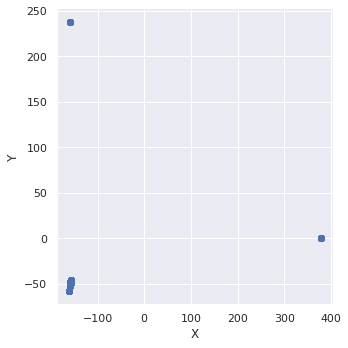

In [80]:
# Scalar pca 畫成2維的圖試試
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(24,18)})

pca = PCA(n_components = 2) # 2維
pic_list = np.array(df_get_vector2['5_Vectors'].tolist())
pic_vector = pca.fit_transform(pic_list)
pic_df = pd.DataFrame(data = pic_vector, columns=['X','Y'])
sns.lmplot('X', 'Y', data = pic_df, fit_reg=False)

plt.show()

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 Component PCA', fontsize = 20)


targets = ['X', 'Y']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()